# Name: Arav Kumar

### Batch Start 19-Aug-24

### Course: Data Science

## CLUSTERING ANALYSIS 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [6]:
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [7]:
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


In [8]:
iso = IsolationForest(contamination=0.05)  
outliers = iso.fit_predict(df[numerical_cols])
df = df[outliers != -1]  


In [9]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
                ID#       Balance    Qual_miles     cc1_miles     cc2_miles  \
count  3.799000e+03  3.799000e+03  3.799000e+03  3.799000e+03  3.799000e+03   
mean  -5.985093e-17 -2.992546e-17 -9.351707e-19  1.645901e-16  3.366615e-16   
std    1.000132e+00  1.000132e+00  1.000132e+00  1.000132e+00  1.000132e+00   
min   -1.765441e+00 -8.633267e-01 -1.481514e-01 -7.556298e-01 -8.692764e-02   
25%   -8.557460e-01 -6.222764e-01 -1.481514e-01 -7.556298e-01 -8.692764e-02   
50%    8.009415e-03 -3.217169e-01 -1.481514e-01 -7.556298e-01 -8.692764e-02   
75%    8.648305e-01  2.768046e-01 -1.481514e-01  7.418337e-01 -8.692764e-02   
max    1.719051e+00  1.423984e+01  1.934422e+01  2.239297e+00  1.602225e+01   

          cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count  3.799000e+03  3.799000e+03  3.799000e+03       3.799000e+03   
mean  -2.113486e-16  4.488820e-17  7.481366e-17      -3.927717e-17   
std    1.000132e+00  1.000132e+00  1.000132e+00       1.00

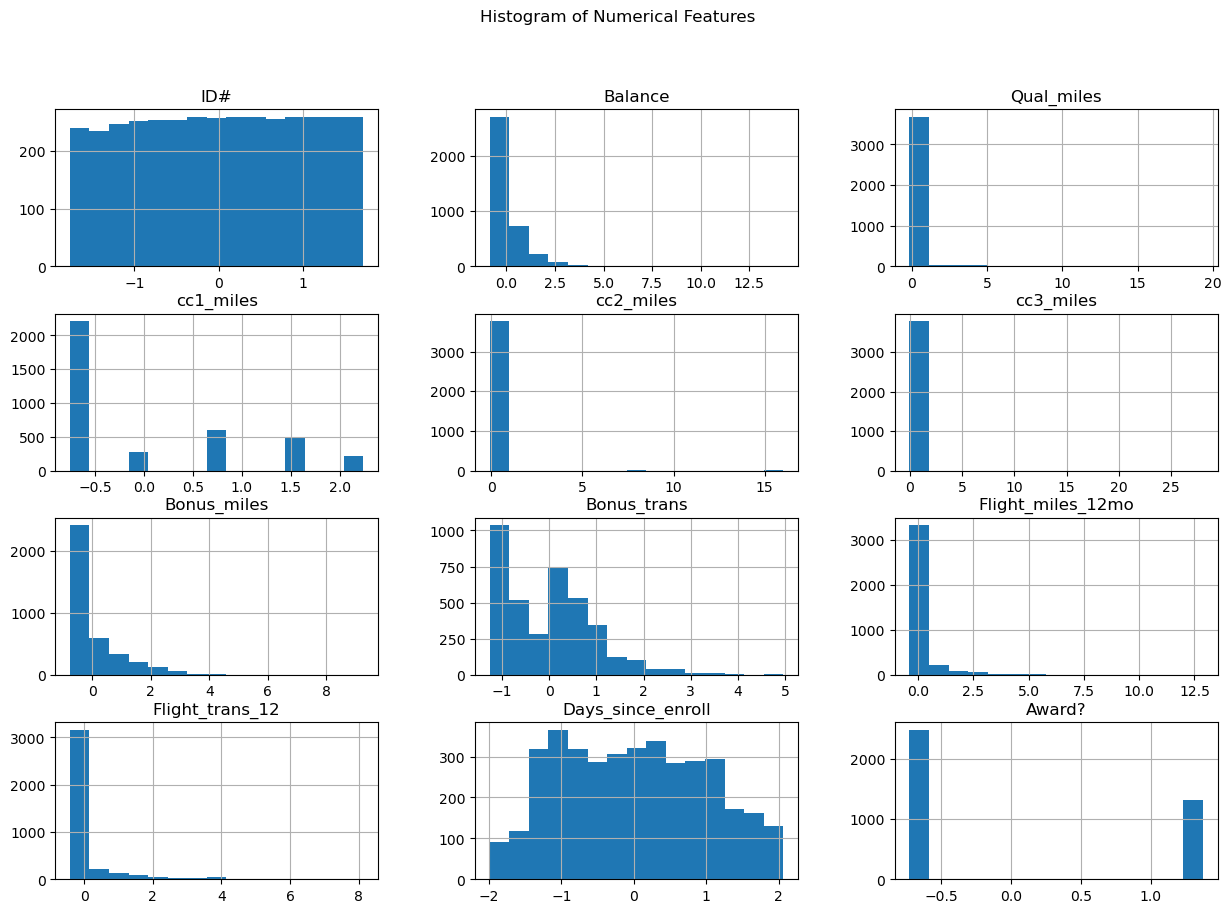

In [11]:
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

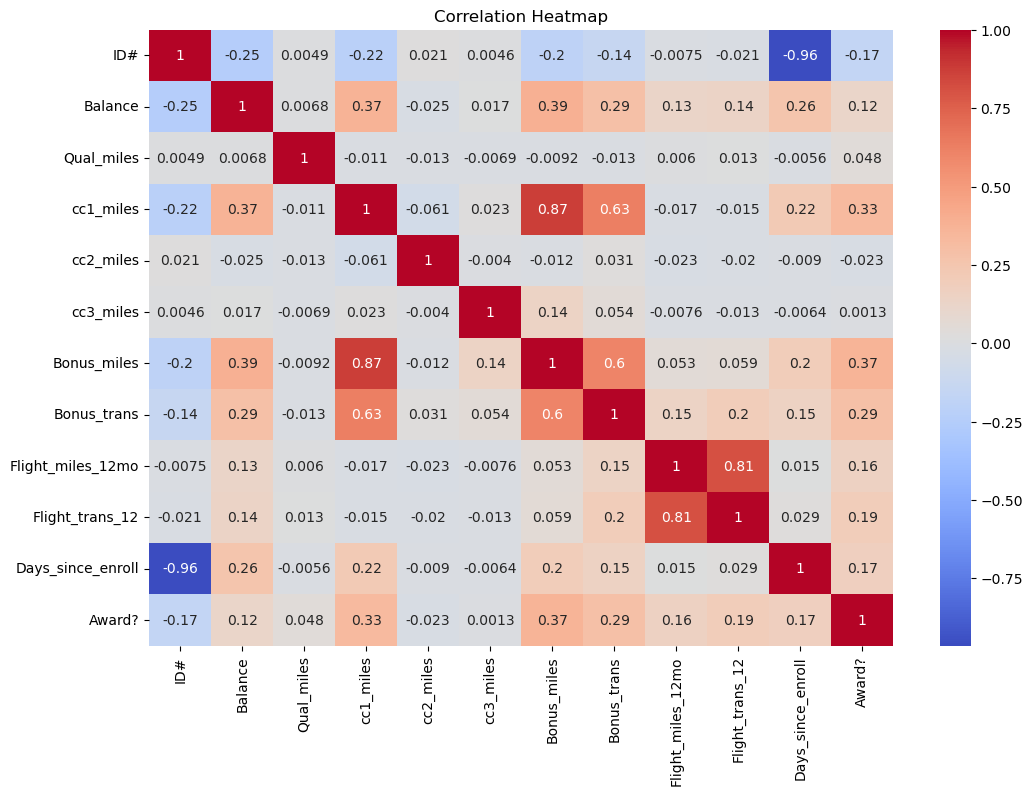

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


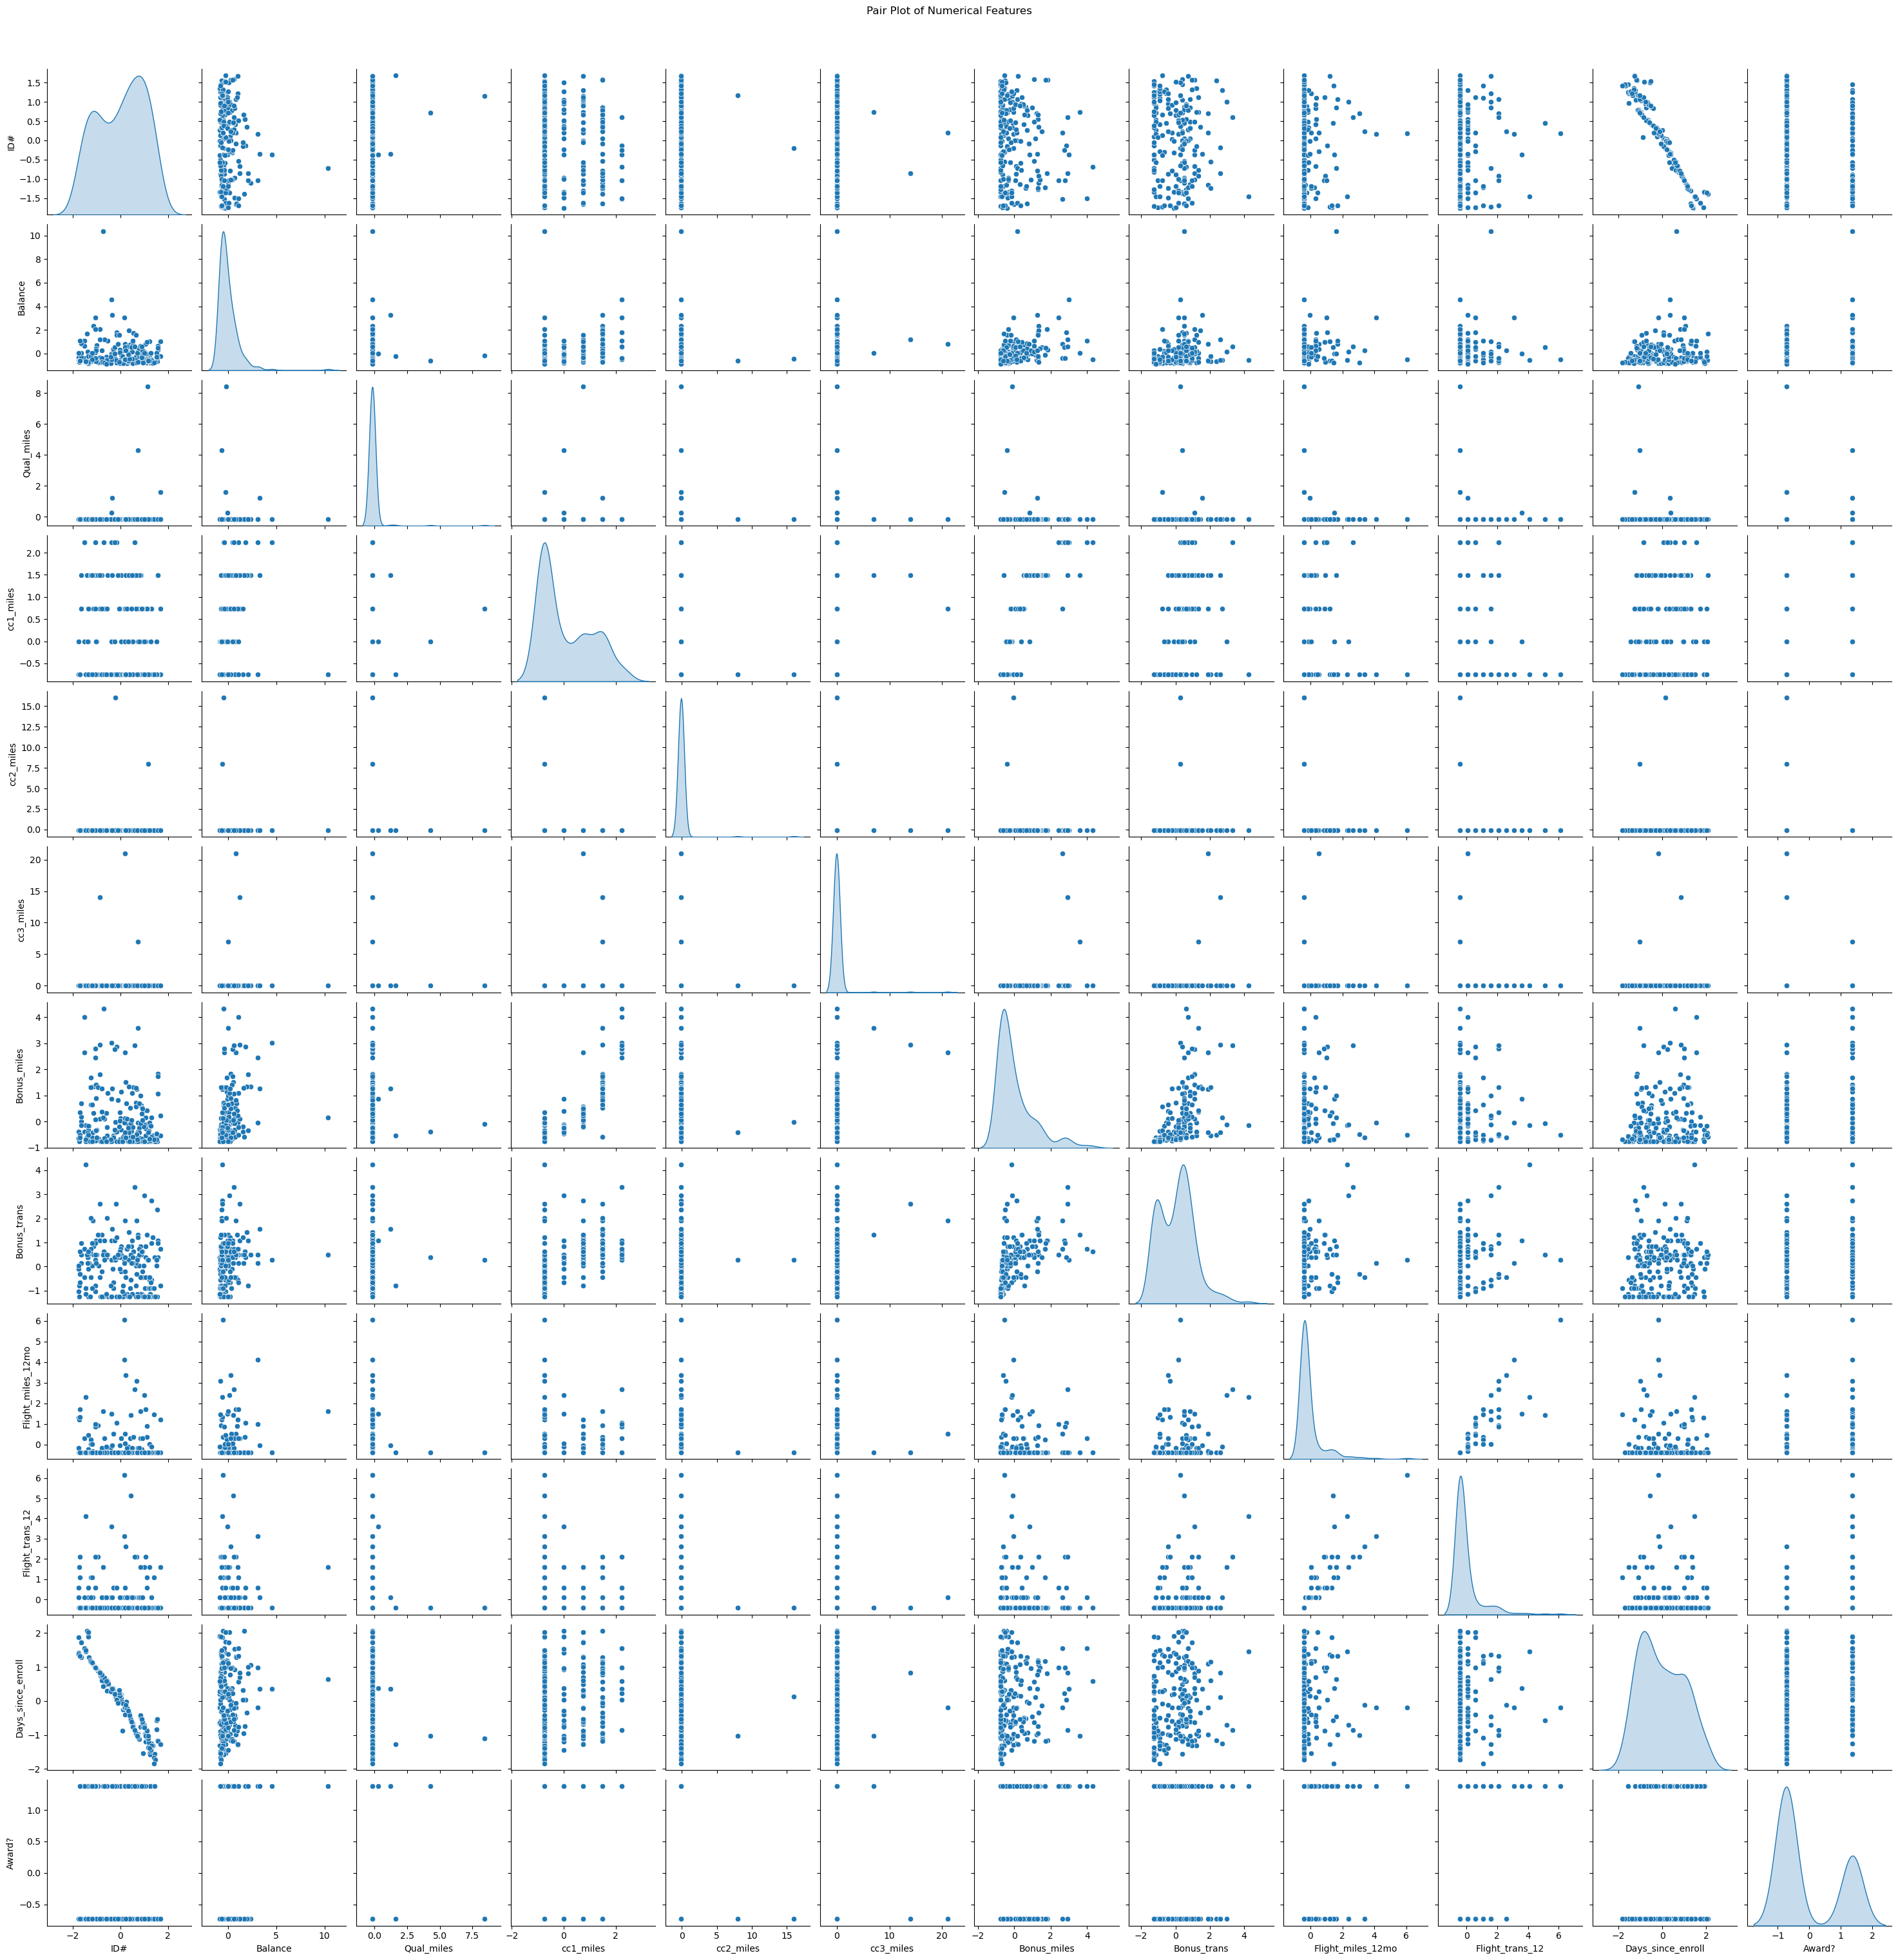

In [13]:
sns.pairplot(df[numerical_cols].sample(200), diag_kind='kde')  # Sampling for better visualization
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

In [14]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [15]:
numerical_data = df[numerical_cols]

In [16]:
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(numerical_data, kmeans.labels_))


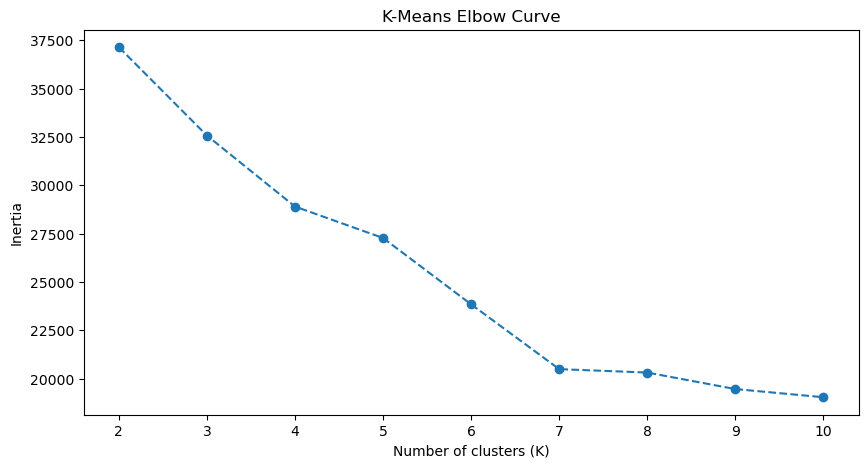

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('K-Means Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

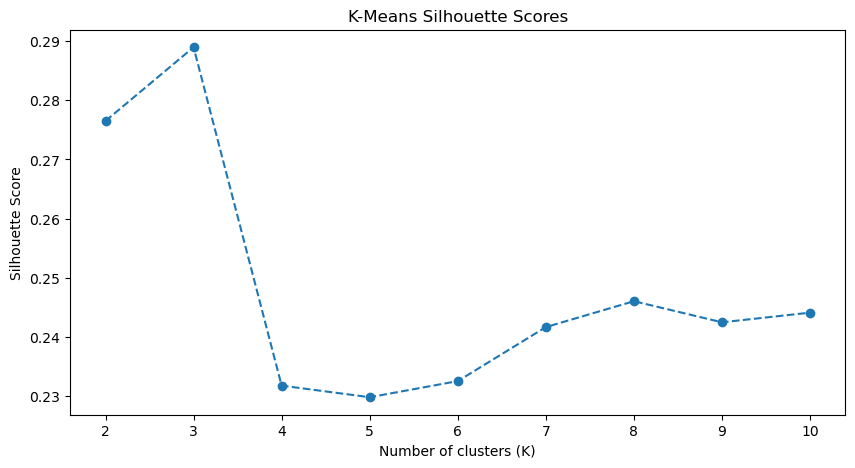

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('K-Means Silhouette Scores')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  
kmeans_labels = kmeans.fit_predict(numerical_data)


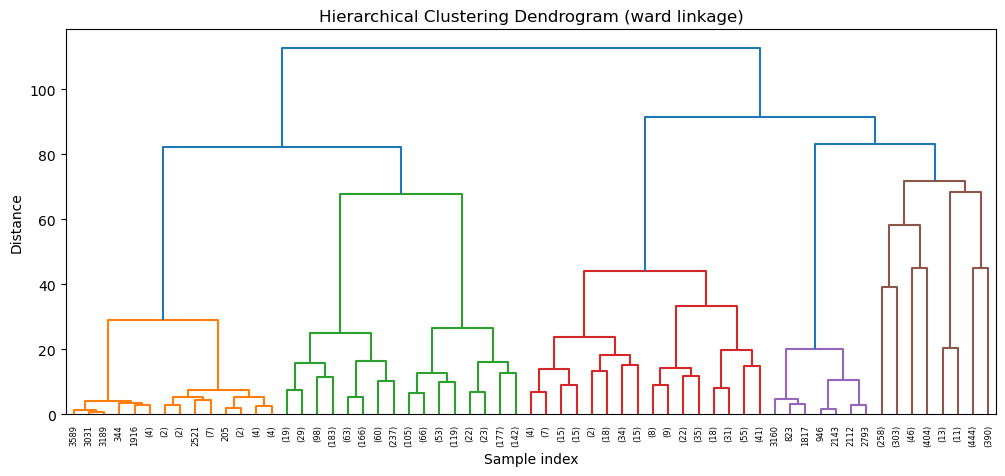

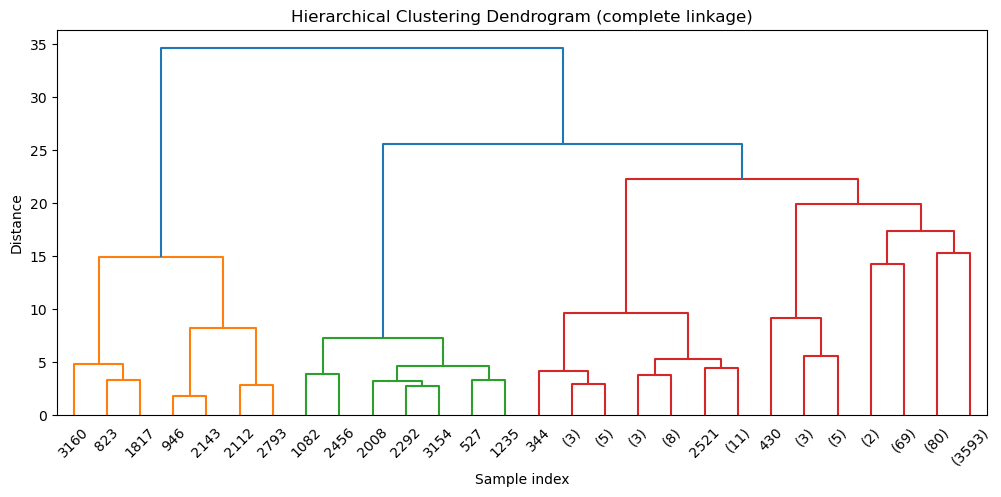

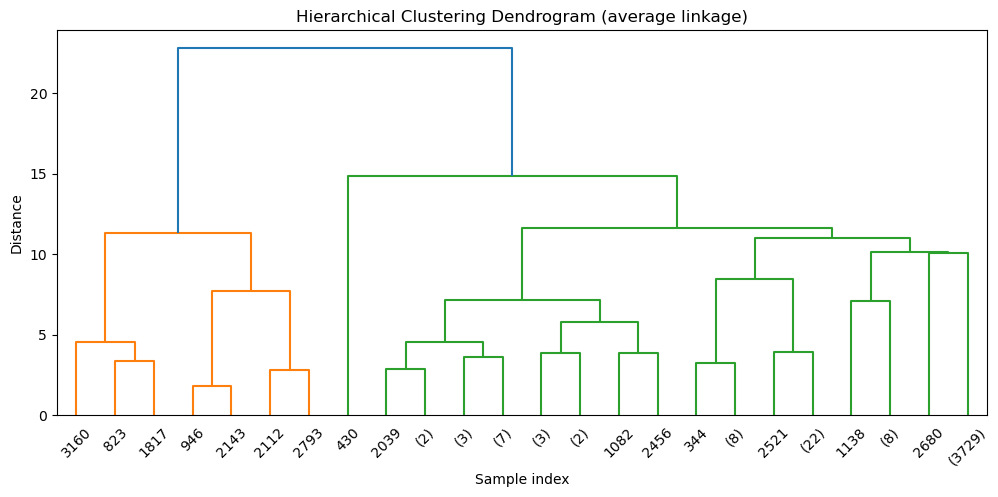

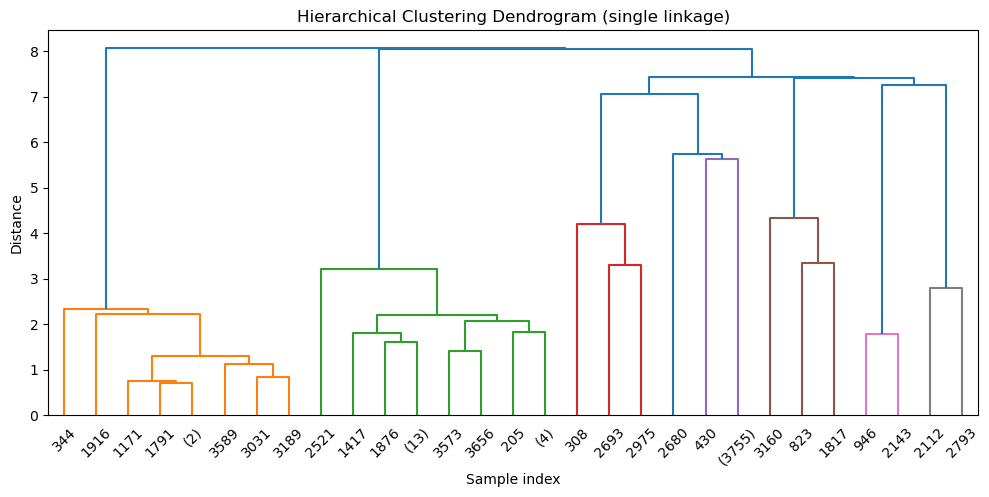

In [20]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    plt.figure(figsize=(12, 5))
    Z = linkage(numerical_data, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [21]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(numerical_data)

In [22]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples = [5, 10, 20]

for eps in eps_values:
    for min_pts in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        dbscan_labels = dbscan.fit_predict(numerical_data)
        unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise points
        if unique_clusters > 1:
            silhouette_avg = silhouette_score(numerical_data, dbscan_labels, metric='euclidean')
            print(f"DBSCAN: eps={eps}, min_samples={min_pts}, clusters={unique_clusters}, silhouette_score={silhouette_avg:.2f}")

DBSCAN: eps=0.3, min_samples=5, clusters=19, silhouette_score=-0.47
DBSCAN: eps=0.3, min_samples=10, clusters=5, silhouette_score=-0.27
DBSCAN: eps=0.5, min_samples=5, clusters=26, silhouette_score=-0.39
DBSCAN: eps=0.5, min_samples=10, clusters=13, silhouette_score=-0.37
DBSCAN: eps=0.7, min_samples=5, clusters=23, silhouette_score=-0.14
DBSCAN: eps=0.7, min_samples=10, clusters=10, silhouette_score=-0.12
DBSCAN: eps=0.7, min_samples=20, clusters=8, silhouette_score=-0.22
DBSCAN: eps=1.0, min_samples=5, clusters=5, silhouette_score=0.13
DBSCAN: eps=1.0, min_samples=10, clusters=3, silhouette_score=0.11
DBSCAN: eps=1.0, min_samples=20, clusters=2, silhouette_score=0.14


In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(numerical_data)


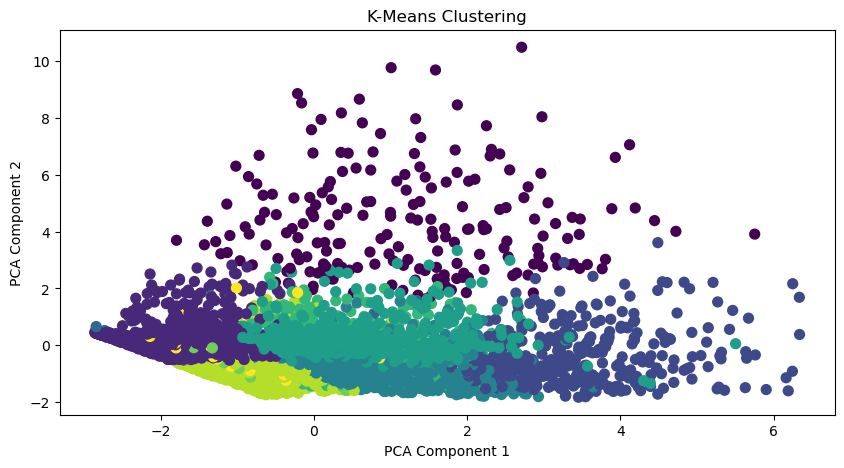

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(numerical_data)

plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

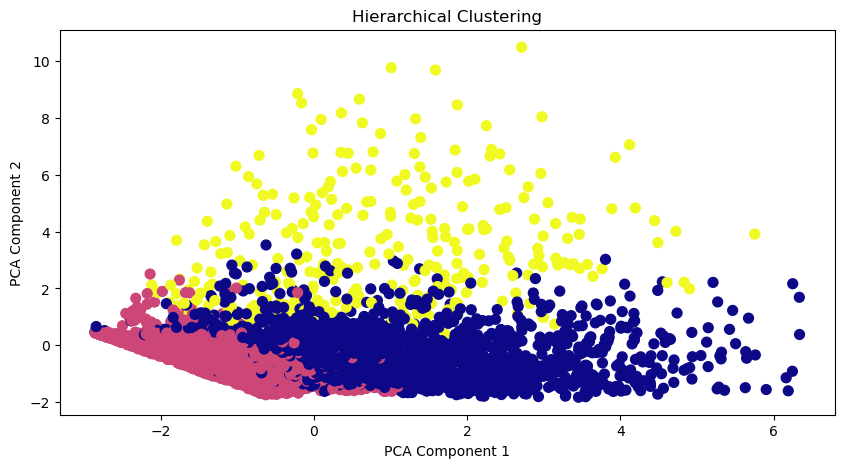

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='plasma', marker='o', s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

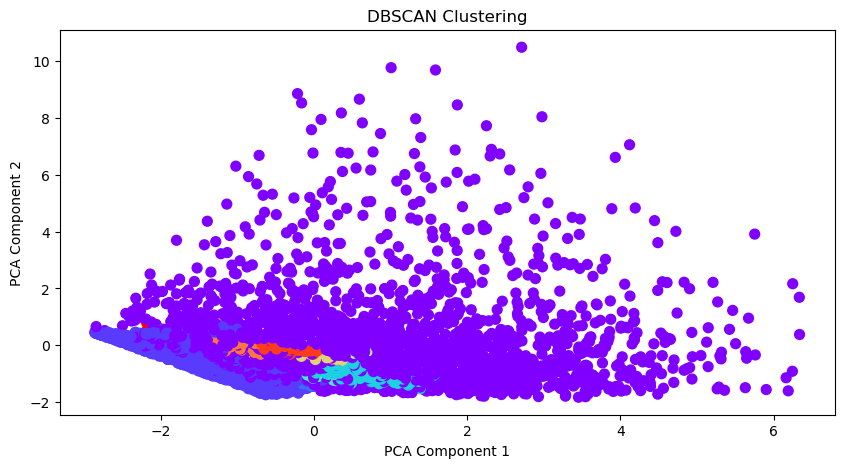

In [26]:
# Plot DBSCAN clusters
plt.figure(figsize=(10, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='rainbow', marker='o', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')
df['KMeans_Cluster'] = kmeans_labels


In [28]:
kmeans_cluster_summary = df.groupby('KMeans_Cluster')[numerical_cols].mean()
print("K-Means Cluster Analysis:")
print(kmeans_cluster_summary)


K-Means Cluster Analysis:
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.082200  0.331924   -0.037456  -0.282551  -0.086928   
1               1.025199 -0.451351   -0.091121  -0.705137  -0.086928   
2              -0.857941  1.019918   -0.042927   1.790058  -0.086928   
3               0.220620 -0.097125    9.393521  -0.140600  -0.086928   
4              -0.730945  0.676647   -0.097706   0.654051  -0.086928   
5               0.784906  0.023179   -0.069483   0.960599  -0.086928   
6              -0.608204 -0.085312    0.017820  -0.296181  -0.086928   
7               0.178093 -0.226856   -0.148151  -0.755630  16.022248   
8              -0.750768 -0.361661   -0.102233  -0.714984  -0.086928   
9               0.297102 -0.324972   -0.148151  -0.657969   7.967660   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                     

In [29]:
df['Hierarchical_Cluster'] = hierarchical_labels

In [30]:
hierarchical_cluster_summary = df.groupby('Hierarchical_Cluster')[numerical_cols].mean()
print("\nHierarchical Clustering Analysis:")
print(hierarchical_cluster_summary)


Hierarchical Clustering Analysis:
                           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                         
0                    -0.216129  0.302475    0.140230   0.643253  -0.086928   
1                     0.244847 -0.388962   -0.146799  -0.700203   0.120248   
2                     0.046114  0.159762   -0.088373  -0.275440  -0.086928   

                      cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                           
0                      0.047432     0.541515     0.480843          -0.152808   
1                     -0.046273    -0.616158    -0.633776          -0.319244   
2                     -0.046273    -0.102516     0.328806           2.418060   

                      Flight_trans_12  Days_since_enroll    Award?  
Hierarchical_Cluster                                                
0                           -0.1467

In [31]:
df['DBSCAN_Cluster'] = dbscan_labels
dbscan_cluster_summary = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numerical_cols].mean()
print("\nDBSCAN Cluster Analysis:")
print(dbscan_cluster_summary)



DBSCAN Cluster Analysis:
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                         
0               0.291761 -0.564022   -0.148151  -0.755630  -0.086928   
1              -1.253446 -0.576128   -0.148151  -0.755630  -0.086928   
2              -0.921740 -0.531046   -0.148151   0.741834  -0.086928   
3              -0.721266  0.172198   -0.148151   0.741834  -0.086928   
4              -0.938958 -0.199837   -0.148151  -0.006898  -0.086928   
5              -0.683178 -0.681868   -0.148151  -0.755630  -0.086928   
6               0.315847 -0.519500   -0.148151  -0.755630  -0.086928   
7               0.473556 -0.584942   -0.148151   0.741834  -0.086928   
8               0.334428  0.392594   -0.148151   0.741834  -0.086928   
9               0.505373 -0.561205   -0.148151  -0.755630  -0.086928   
10              0.786311 -0.288413   -0.148151  -0.006898  -0.086928   
11              0.776144 -0.127825   -

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [33]:
numerical_data = df[numerical_cols]


In [34]:
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [35]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numerical_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]


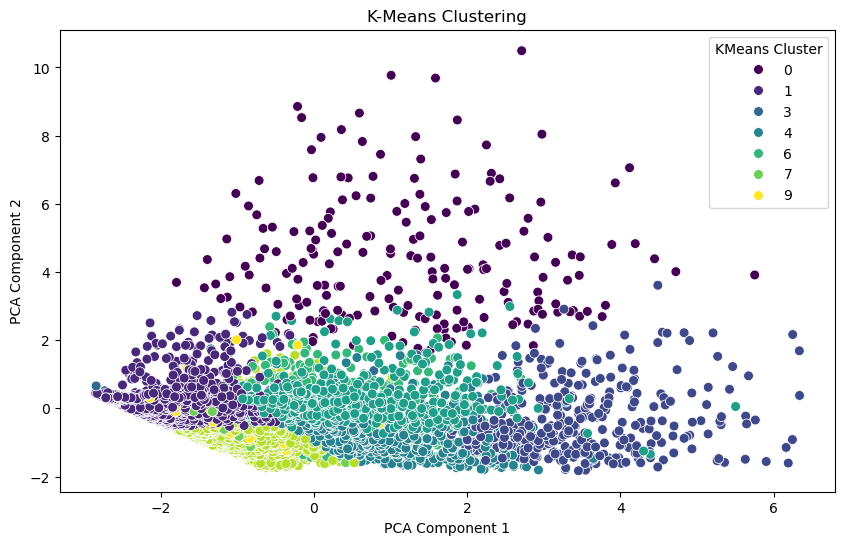

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='viridis', s=50, marker='o')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='KMeans Cluster')
plt.show()

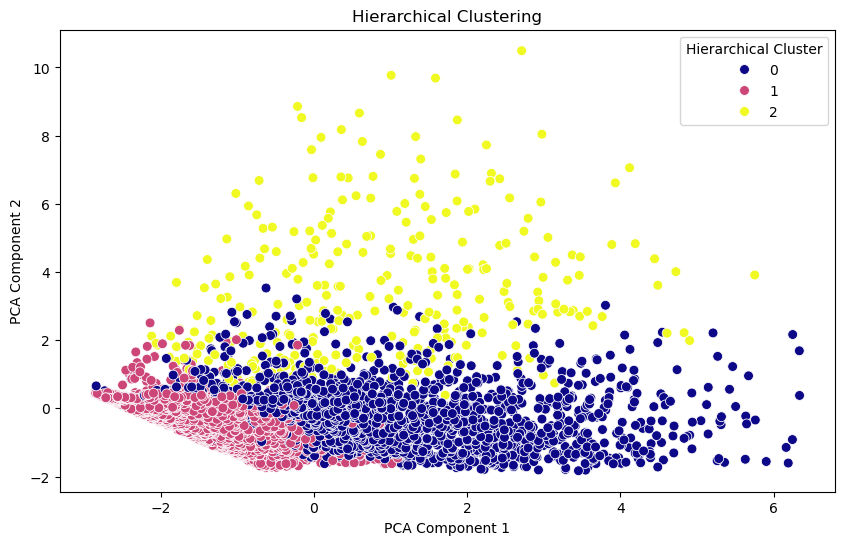

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='plasma', s=50, marker='o')
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Hierarchical Cluster')
plt.show()


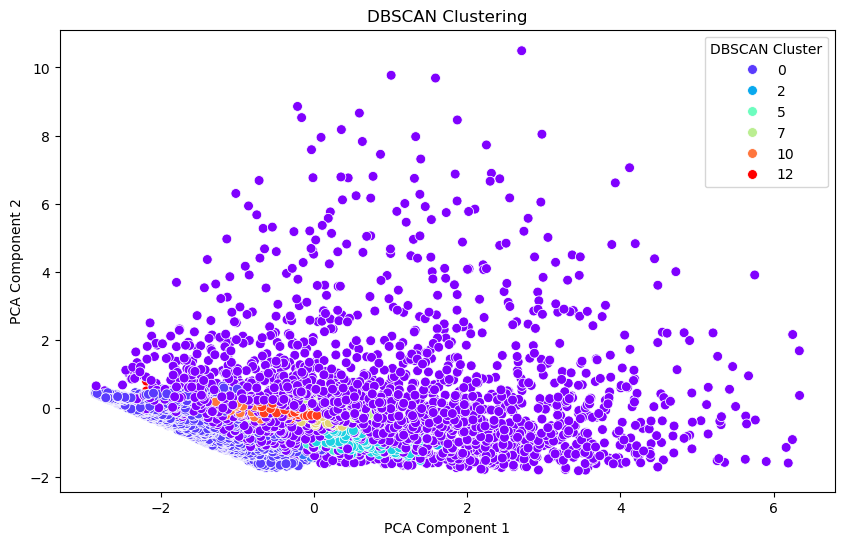

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df, palette='rainbow', s=50, marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='DBSCAN Cluster')
plt.show()

In [39]:
kmeans_silhouette = silhouette_score(numerical_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")

K-Means Silhouette Score: 0.24


In [40]:
dbscan_core_points = numerical_data[df['DBSCAN_Cluster'] != -1]
dbscan_labels_core = dbscan_labels[df['DBSCAN_Cluster'] != -1]

In [41]:
if len(set(dbscan_labels_core)) > 1: 
    dbscan_silhouette = silhouette_score(dbscan_core_points, dbscan_labels_core)
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.2f}")
else:
    print("DBSCAN clustering did not produce more than one cluster; Silhouette Score is not applicable.")

DBSCAN Silhouette Score (excluding noise): -0.21
